# Import All Packege and CSV File

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import nltk
from sklearn import preprocessing

# Load the dataset
file_path = 'Dataset .csv'
df = pd.read_csv(file_path)
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# LEVEL 1

# Task 1 : Top Cuisines

1.  Determine the top three most common cuisines in the dataset.
2.  Calculate the percentage of restaurants that serve each of the top cuisines.


In [86]:
cuisine_column = 'Cuisines'
cuisine_series = df[cuisine_column].str.split(',').explode().str.strip()

cuisine_counts = cuisine_series.value_counts()

top_cuisines = cuisine_counts.head(3)

total_restaurants = len(df)
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100

print("Top 3 most common cuisines:")
print(top_cuisines)

print("\nPercentage of Restaurants Serving Each of the Top Cuisines:")
print(top_cuisines_percentage)

Top 3 most common cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

Percentage of Restaurants Serving Each of the Top Cuisines:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


# Task 2 : City Analysis

1.  Identify the city with the highest number of restaurants in the dataset.
2.  Calculate the average rating for restaurants in each city. 
3.  Determine the city with the highest average rating.


In [89]:
city_counts = df['City'].value_counts()
city_with_most_restaurants = city_counts.idxmax()

average_ratings = df.groupby('City')['Aggregate rating'].mean()

city_with_highest_avg_rating = average_ratings.idxmax()
highest_avg_rating = average_ratings.max()


print(f"City with the highest number of restaurants: {city_with_most_restaurants}")
print(f"Number of restaurants in {city_with_most_restaurants}: {city_counts[city_with_most_restaurants]}")

print("\nAverage rating for restaurants in each city:")
print(average_ratings)

print(f"\nCity with the highest average rating: {city_with_highest_avg_rating}")
print(f"Highest average rating: {highest_avg_rating:.2f}")

City with the highest number of restaurants: New Delhi
Number of restaurants in New Delhi: 5473

Average rating for restaurants in each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

City with the highest average rating: Inner City
Highest average rating: 4.90


# Task 3 : Price Range Distribution

1.  Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
2.  Calculate the percentage of restaurants in each price range category.


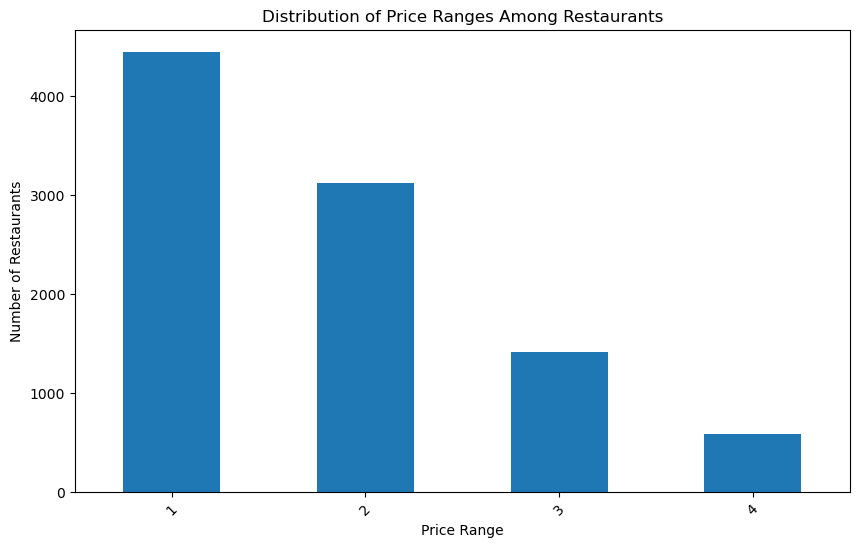

Percentage of Restaurants in Each Price Range Category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [92]:
price_range_counts = df['Price range'].value_counts()

total_restaurants = len(df)
price_range_percentage = (price_range_counts / total_restaurants) * 100

plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

print("Percentage of Restaurants in Each Price Range Category:")
print(price_range_percentage)

# Task 4 : Online Delivery

1.  Determine the percentage of restaurants that offer online delivery.
2.  Compare the average ratings of restaurants with and without online delivery.


In [95]:
r = len(df['Restaurant Name'])
x = df['Has Online delivery'].value_counts()
print(x)
percentage_restaurant = (x/r)*100
print('\n',percentage_restaurant)
print('\n Percentage of restaurants that offer online delivery:', percentage_restaurant.iloc[1])


avg_rating=df['Aggregate rating'].groupby(df ['Has Online delivery']).mean()
print()
print(avg_rating)
print('\nAverage ratings of restaurants with online delivery is', avg_rating.iloc[1],' and without online delivery is', avg_rating.iloc[0])

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

 Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

 Percentage of restaurants that offer online delivery: 25.662234321013504

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

Average ratings of restaurants with online delivery is 3.2488372093023252  and without online delivery is 2.465295774647887


#  LEVEL 2 

# Task 1 : Restaurant Ratings

1.  Analyze the distribution of aggregate ratings and determine the most common rating range.
2.  Calculate the average number of votes received by restaurants.

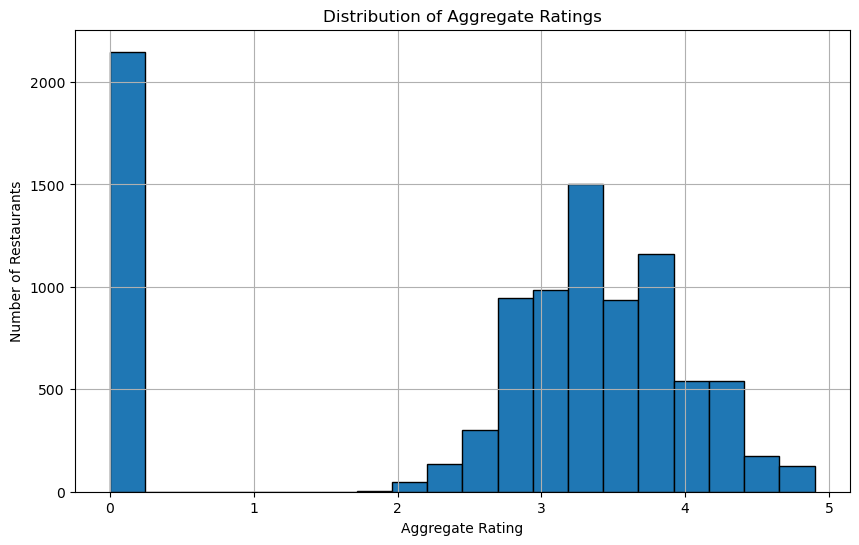

Most common rating range: 0.0 with 2148 Restaurant
Average number of votes received by restaurants: 156.91


In [99]:
plt.figure(figsize=(10, 6))
df['Aggregate rating'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()

# Determine the most common rating range
rating_counts = df['Aggregate rating'].value_counts().sort_index()
most_common_rating_range = rating_counts.idxmax()
most_common_rating_count= rating_counts.max()
print(f"Most common rating range: {most_common_rating_range} with {most_common_rating_count} Restaurant")


average_votes = df['Votes'].mean()
print(f"Average number of votes received by restaurants: {average_votes:.2f}")

# Task 2 : Cuisine Combination

1.  Identify the most common combinations of cuisines in the dataset.
2.  Determine if certain cuisine combinations tend to have higher ratings.


In [102]:
c = df['Cuisines'].value_counts()
print('Top common combinations of cuisines:', c.head(3))

higher_rating=df['Aggregate rating'].groupby(df['Cuisines']).max()
print(f" {higher_rating.idxmax()} cuisines Combination has highest rating which is {higher_rating.max()}. ")

Top common combinations of cuisines: Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64
 American, BBQ, Sandwich cuisines Combination has highest rating which is 4.9. 


# Task 3 : Geographic Analysis

1.  Plot the locations of restaurants on a map using longitude and latitude coordinates.
2.  Identify any patterns or clusters of restaurants in specific areas.


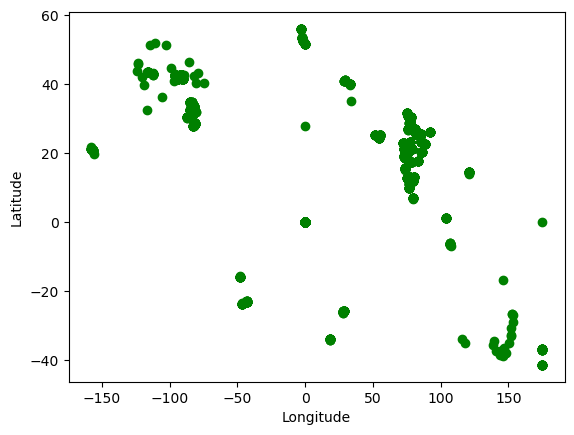

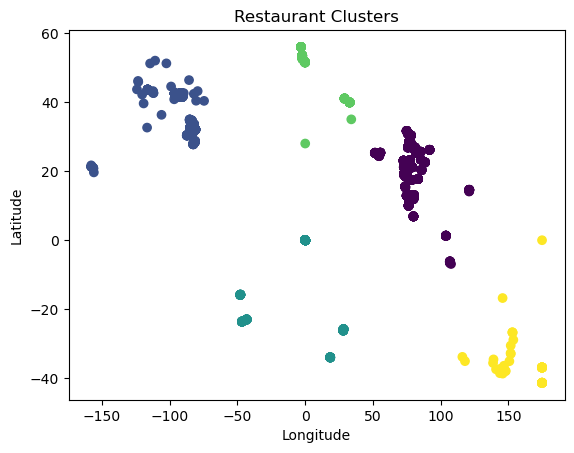

In [105]:
plt.scatter(x=df['Longitude'], y=df['Latitude'],color='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

coordinates = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(coordinates)
df['Cluster'] = kmeans.labels_
plt.scatter(coordinates ['Longitude'], coordinates ['Latitude'], c=df['Cluster'], marker='o') 
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Task 4 : Restaurant Chains

1.  Identify if there are any restaurant chains present in the dataset.
2.  Analyze the ratings and popularity of different restaurant chains.


In [108]:
restaurant_count=df['Restaurant Name'].value_counts() 
restaurant_chain=restaurant_count[restaurant_count>1]
print('Restaurant chains:', restaurant_chain)


chains_df = df[df['Restaurant Name'].isin (restaurant_chain.index)]
chain_analysis = chains_df.groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Votes': 'sum'}).reset_index()
chain_analysis = chain_analysis.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False])
print(chain_analysis)

Restaurant chains: Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64
               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
..                         ...               ...    ...
440           Murliwala Bakers             0.000      0
538        Rajdhani Restaurant             0.000      0
616                Street Cafe             0.000      0
645              The Big Scoop             0.000      0
713               Whatslife.in     

#  LEVEL 3 

# Task 1 : Restaurant Reviews

1.  Analyze the text reviews to identify the most common positive and negative keywords. 
2.  Calculate the average length of reviews and explore if there is a relationship between review length and rating.


In [112]:
df['Rating text'].value_counts()

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    return ' '.join(text)
    
df['Cleaned Reviews'] = df['Rating text'].astype (str).apply(clean_text)

def classify_sentiment (text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis. sentiment.polarity < 0 else 'neutral'

df['Sentiment'] = df['Cleaned Reviews'].apply(classify_sentiment)

positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Cleaned Reviews'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Cleaned Reviews'])

positive_words = Counter(positive_reviews.split())
negative_words = Counter(negative_reviews.split())

top_positive_words = positive_words.most_common (5)
top_negative_words = negative_words.most_common (5)

print("Top 5 Positive Keywords:")
for word, freq in top_positive_words:
    top_positive_words = positive_words.most_common (5)
    top_negative_words = negative_words.most_common (5)
    
print("Top 5 Positive Keywords: ")
for word, freq in top_positive_words:
    print (f"{word}: {freq}")
    
print("\nTop 5 Negative Keywords:")
for word, freq in top_negative_words:
    print (f"{word}: {freq}")
print(" ")

df['Rating length'] = df ['Rating text'].astype(str).apply(len)
avg_length = df['Rating length'].mean()
print('Average length of review: ', avg_length)
correlation = df[['Rating length', 'Aggregate rating']].corr().iloc[0,1]
print('Relationship between review length and rating:',correlation)

Top 5 Positive Keywords:
Top 5 Positive Keywords: 
Good: 3179
Very: 1079
Excellent: 301

Top 5 Negative Keywords:
Average: 3737
Poor: 186
 
Average length of review:  7.020730813527379
Relationship between review length and rating: -0.4788848381349332


# Task 2 : Votes Analysis

1.  Identify the restaurants with the highest and lowest number of votes.
2.  Analyze if there is a correlation between the number of votes and the rating of a restaurant.


In [114]:
i1=df['Votes'].idxmax()
i2=df['Votes'].idxmin()
print('Restaurants with the highest Votes is', df['Restaurant Name'].iloc[i1])
print('Restaurants with the lowest Votes is', df['Restaurant Name'].iloc[i2])


correlation = df[['Aggregate rating', 'Votes']].corr().iloc[0,1]
print('\nRelationship between Rating and Votes:', correlation)


Restaurants with the highest Votes is Toit
Restaurants with the lowest Votes is Cantinho da Gula

Relationship between Rating and Votes: 0.3136905841954099


# Task 3 : Price Range vs. Online Delivery and Table Booking

1.  Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
2. Determine if higher-priced restaurants are more likely to offer these services.


In [116]:
label_encoder = preprocessing.LabelEncoder()
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])

correlation = df[ ['Price range', 'Has Online delivery', 'Has Table booking']].corr()
print('Relationship between the price range and the availability of online delivery and table booking: \n', correlation)

online_delivery_proportions = df.groupby('Price range')['Has Online delivery'].mean() * 100
table_booking_proportions = df.groupby('Price range')['Has Table booking'].mean() * 100
print('\nOnline service provider: \n',online_delivery_proportions)
print('\nTable booking service provider: \n', table_booking_proportions)

Relationship between the price range and the availability of online delivery and table booking: 
                      Price range  Has Online delivery  Has Table booking
Price range             1.000000             0.077918           0.501925
Has Online delivery     0.077918             1.000000           0.101224
Has Table booking       0.501925             0.101224           1.000000

Online service provider: 
 Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64

Table booking service provider: 
 Price range
1     0.022502
2     7.677482
3    45.738636
4    46.757679
Name: Has Table booking, dtype: float64


In [123]:
df.to_csv('Fnal_Restaurants_Data.csv')